In [14]:
import pandas as pd
import numpy as np
import geopandas as gpd
import geoplot as gpt

In [66]:
_19 = pd.read_csv('fd_incidents_2019_datasd_v1.csv')
_19['address_zip'] = _19['address_zip'].fillna(0.0).astype(int).astype(str)
counts = _19.groupby('address_zip').count().to_dict()['incident_number']
zips = _19['address_zip'].unique()

['92101' '92123' '92129' '92154' '92119' '92122' '92110' '92130' '92113'
 '92104' '92103' '92102' '92131' '92128' '92108' '92173' '92037' '92114'
 '92126' '92115' '92105' '92139' '92109' '92111' '92120' '92116' '92106'
 '92117' '92121' '92107' '91942' '92124' '92182' '92127' '92027' '92014'
 '92145' '92136' '92161' '92025' '92140' '92093' '0' '92065' '91911'
 '91950' '92071' '92029' '91932' '92134' '91945' '92067' '92075']


In [33]:
ca = gpd.read_file('ca_zip_code.geojson')
print(ca)

     STATEFP10 ZCTA5CE10  GEOID10 CLASSFP10 MTFCC10 FUNCSTAT10    ALAND10  \
0           06     94601  0694601        B5   G6350          S    8410939   
1           06     94501  0694501        B5   G6350          S   20539466   
2           06     94560  0694560        B5   G6350          S   35757865   
3           06     94587  0694587        B5   G6350          S   51075108   
4           06     94580  0694580        B5   G6350          S    8929836   
...        ...       ...      ...       ...     ...        ...        ...   
1764        06     95375  0695375        B5   G6350          S    7889388   
1765        06     95627  0695627        B5   G6350          S  133169251   
1766        06     95607  0695607        B5   G6350          S  347705376   
1767        06     95919  0695919        B5   G6350          S   64005512   
1768        06     95903  0695903        B5   G6350          S   37588823   

      AWATER10   INTPTLAT10    INTPTLON10 PARTFLG10  \
0       310703  +37.

In [75]:
san_diego1 = ca[ca['ZCTA5CE10'].isin(zips)]
san_diego1 = san_diego1.reset_index()
incidents = pd.Series([])
for i in range(len(san_diego1)):
    if san_diego1['ZCTA5CE10'][i] in counts:
        incidents[i] = counts[san_diego1['ZCTA5CE10'][i]]
san_diego1.insert(3, 'incidents', incidents)
san_diego1['incidents'] = san_diego1['incidents'].fillna(0.0).astype(int)
print(san_diego1)

    index STATEFP10 ZCTA5CE10  incidents  GEOID10 CLASSFP10 MTFCC10  \
0     159        06     92014        593  0692014        B5   G6350   
1     161        06     92111       4703  0692111        B5   G6350   
2     162        06     92108       4427  0692108        B5   G6350   
3     163        06     92037       4888  0692037        B5   G6350   
4     164        06     92104       4349  0692104        B5   G6350   
5     165        06     92154       7191  0692154        B5   G6350   
6     166        06     92067          2  0692067        B5   G6350   
7     167        06     92075          3  0692075        B5   G6350   
8     168        06     92103       7002  0692103        B5   G6350   
9     392        06     92109       6171  0692109        B5   G6350   
10    393        06     92116       2115  0692116        B5   G6350   
11    394        06     92117       4477  0692117        B5   G6350   
12    399        06     92102       5973  0692102        B5   G6350   
13    

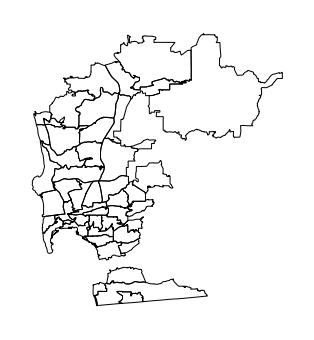

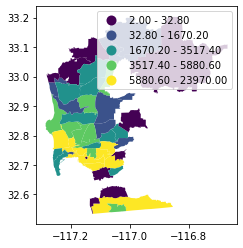

In [76]:
gpt.polyplot(san_diego1)
san_diego1.plot(column = 'incidents', legend=True, scheme='quantiles')

In [73]:
county = gpd.read_file('san_diego_zip_codes.geojson')
san_diego2 = county[county['zip'].isin(zips)]
san_diego2 = san_diego2.reset_index()
incidents2 = pd.Series([])
for i in range(len(san_diego2)):
    if san_diego2['zip'][i] in counts:
        incidents2[i] = counts[san_diego2['zip'][i]]
san_diego2.insert(0, 'incidents', incidents2)
san_diego2['incidents'] = san_diego2['incidents'].fillna(0.0).astype(int)
print(san_diego2)

    incidents  index        community     shape_star     shape_stle    zip  \
0          23      5      Chula Vista  329043951.316  93108.6951441  91911   
1           4      7        Escondido  590427469.729  159517.051068  92029   
2          40     18          La Mesa  169785818.051  83595.7605049  91942   
3           3     19      Lemon Grove   107511055.85  63900.7904081  91945   
4          28     22   Imperial Beach  159136535.723  76700.7596055  91932   
5          23     24    National City  233855418.246  117648.679171  91950   
6         121     34        Escondido  2439286395.49  294479.349374  92027   
7         593     41          Del Mar  183559953.572  87766.3580773  92014   
8          47     46        Escondido  688939140.621  164368.764257  92025   
9        4888     48         La Jolla   61824519.209  51166.2661629  92037   
10       4888     49         La Jolla   263401447.06  96003.7994868  92037   
11          4     62           Ramona  4997078158.12  473502.512

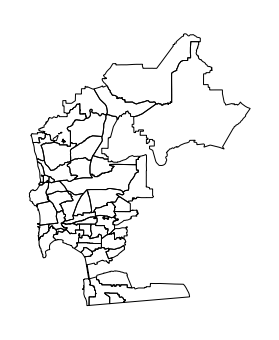

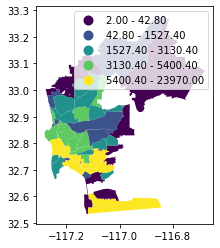

In [74]:
gpt.polyplot(san_diego2)
san_diego2.plot(column = 'incidents', legend=True, scheme='quantiles')

In [57]:
boundary = gpd.read_file('san_diego_boundary_datasd.geojson')
print(boundary)

   objectid  code                                           geometry
0        49     0  POLYGON ((-117.01059 32.86318, -117.01058 32.8...
1        50     0  POLYGON ((-116.54561 32.68519, -116.54745 32.6...
2        51     0  POLYGON ((-116.93243 32.64890, -116.93251 32.6...
3        52     0  POLYGON ((-116.93148 32.60476, -116.93164 32.6...
4        61     0  POLYGON ((-117.01106 33.11156, -117.01106 33.1...


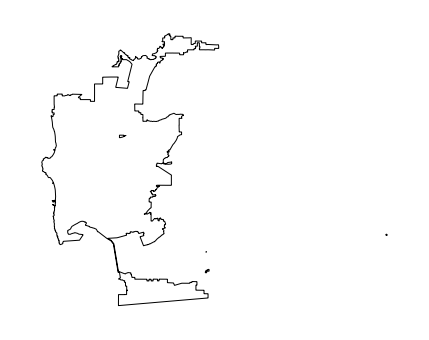

In [58]:
gpt.polyplot(boundary)